### Biblotek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Läser in datan

In [3]:
df = pd.read_csv('../data/taxi_trip_pricing.csv')

### Går igenom datan 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [6]:
df.describe

<bound method NDFrame.describe of      Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0               19.35     Morning     Weekday              3.0   
1               47.59   Afternoon     Weekday              1.0   
2               36.87     Evening     Weekend              1.0   
3               30.33     Evening     Weekday              4.0   
4                 NaN     Evening     Weekday              3.0   
..                ...         ...         ...              ...   
995              5.49   Afternoon     Weekend              4.0   
996             45.95       Night     Weekday              4.0   
997              7.70     Morning     Weekday              3.0   
998             47.56     Morning     Weekday              1.0   
999             22.85     Morning     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                  Low   Clear       3.56         0.80             0.32   
1                 High 

In [7]:
df.shape

(1000, 11)

In [8]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [9]:
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent[null_percent > 0]

Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64

### Städar upp datan

In [10]:

df.columns.tolist()

['Trip_Distance_km',
 'Time_of_Day',
 'Day_of_Week',
 'Passenger_Count',
 'Traffic_Conditions',
 'Weather',
 'Base_Fare',
 'Per_Km_Rate',
 'Per_Minute_Rate',
 'Trip_Duration_Minutes',
 'Trip_Price']

In [11]:
df.columns.tolist()

['Trip_Distance_km',
 'Time_of_Day',
 'Day_of_Week',
 'Passenger_Count',
 'Traffic_Conditions',
 'Weather',
 'Base_Fare',
 'Per_Km_Rate',
 'Per_Minute_Rate',
 'Trip_Duration_Minutes',
 'Trip_Price']

### # Rader där endast priset saknas - för predictions senare

In [17]:
df_for_prediction = df[df['Trip_Price'].isna() & df.drop(columns=['Trip_Price']).notna().all(axis=1)]
df_for_prediction

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
32,4.19,Morning,Weekday,1.0,Low,Clear,4.07,1.89,0.19,69.06,NaN
94,38.78,Morning,Weekday,3.0,Medium,Clear,3.08,1.62,0.15,90.14,NaN
167,10.14,Afternoon,Weekday,4.0,Low,Rain,4.50,1.62,0.38,25.41,NaN
178,46.90,Evening,Weekday,1.0,High,Clear,4.14,1.33,0.13,66.38,NaN
207,33.51,Afternoon,Weekend,3.0,Low,Clear,2.31,1.32,0.40,62.87,NaN
212,32.95,Morning,Weekday,1.0,Medium,Clear,3.36,1.56,0.19,81.37,NaN
228,44.71,Night,Weekday,1.0,Low,Rain,2.50,1.94,0.47,45.94,NaN
261,49.51,Evening,Weekday,3.0,Medium,Snow,4.81,0.74,0.14,82.21,NaN
264,43.99,Morning,Weekday,3.0,Medium,Clear,4.62,1.69,0.36,23.91,NaN


In [14]:
df_with_price = df[df['Trip_Price'].notna()]
df_with_price

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [18]:
df.shape, df_for_prediction.shape, df_with_price.shape

((1000, 11), (26, 11), (951, 11))

### Ta bort alla null kolumner

In [19]:
df_clean = df_with_price.dropna()

df_with_price.shape, df_clean.shape

((951, 11), (562, 11))

### Visuliserar priset

In [20]:
df_clean['Trip_Price'].describe()

count    562.000000
mean      57.663525
std       43.958741
min        6.126900
25%       33.583875
50%       50.157850
75%       69.146575
max      332.043689
Name: Trip_Price, dtype: float64

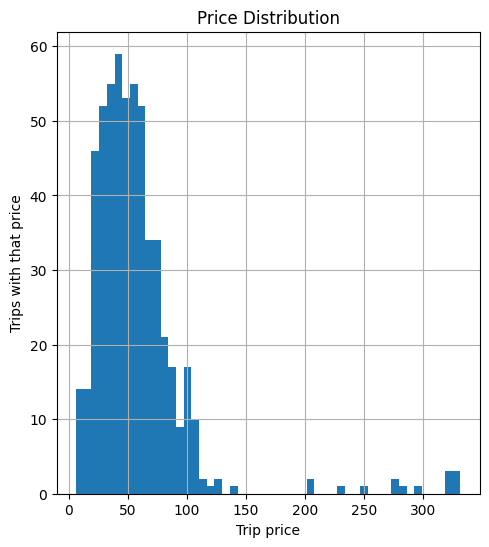

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_clean['Trip_Price'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Trip price')
plt.ylabel('Trips with that price')
plt.show()

### Keep price between 0 - 500

In [36]:
df_clean = df_clean[(df_clean['Trip_Price'] > 0) & (df_clean['Trip_Price'] < 500)]

In [35]:
df_clean.to_csv('../data/taxi_data_cleaned.csv', index=False)
df_for_prediction.to_csv('../data/taxi_data_for_prediction.csv', index=False)